# Pan005 Transects temp

In [1]:
import dask.distributed as dsk
import glob
import intake
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import xesmf as xe

import warnings # ignore these warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

In [2]:
import logging
logging.getLogger("matplotlib").setLevel(logging.WARNING)

In [3]:
from dask.distributed import Client
client = Client(threads_per_worker=1)
client


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/40979/status,
Dashboard: /proxy/40979/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:32929,Workers: 28
Dashboard: /proxy/40979/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:32771,Total threads: 1
Dashboard: /proxy/43511/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:40223,


In [4]:
pathsC = np.sort(glob.glob('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/outpu*/*.ocean_month_z.nc'))[-120:]
pathsM = np.sort(glob.glob('/g/data/g40/akm157/model_output/mom6-panan/panant-005-zstar-ssp126-MW-only/outpu*/*.ocean_month_z.nc'))[:60]

In [5]:
shelf_mask = shelf_mask = xr.open_dataset('/g/data/ik11/grids/Antarctic_slope_contour_1000m_MOM6_005deg.nc')['contour_masked_above']

In [6]:
areaC = xr.open_dataset('/g/data/ol01/outputs/mom6-panan/panant-005-zstar-ACCESSyr2/output239/20101201.ocean_static.nc')['areacello'].sel(xh=shelf_mask['xh'])
areaM = xr.open_dataset('/g/data/g40/akm157/model_output/mom6-panan/panant-005-zstar-ssp126-MW-only/output120/20010101.ocean_static.nc')['areacello'].sel(xh=shelf_mask['xh'])

In [47]:
def preprocess(ds):
    ds = ds[['thetao', 'volcello']].sel(yh=slice(-70,-59))
    return ds

cont = xr.open_mfdataset(pathsC, preprocess = preprocess, chunks = 'auto')
melt = xr.open_mfdataset(pathsM, preprocess = preprocess, chunks = 'auto')

In [48]:
tempC = cont['thetao']
volcC = cont['volcello']
thikC = cont['volcello']/areaC

In [49]:
tempM = melt['thetao']
volcM = melt['volcello']
thikM = melt['volcello']/areaM

In [56]:
temp_135lon_C = tempC.sel(xh='45',method='nearest').mean('time')
temp_135lon_M = tempM.sel(xh='45',method='nearest').mean('time')

In [57]:
temp_135_anom = temp_135lon_M - temp_135lon_C

In [58]:
temp_135_anom.load()

<xarray.DataArray 'thetao' (z_l: 75, yh: 493)> Size: 148kB
array([[           nan,            nan,            nan, ...,
        -5.7449579e-02, -5.8974028e-02, -6.0753465e-02],
       [           nan,            nan,            nan, ...,
        -5.7466865e-02, -5.8985472e-02, -6.0745955e-02],
       [           nan,            nan,            nan, ...,
        -5.7519436e-02, -5.8969378e-02, -6.0693026e-02],
       ...,
       [           nan,            nan,            nan, ...,
        -3.8325787e-05, -8.9108944e-05, -1.9645691e-04],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]], dtype=float32)
Coordinates:
    xh       float64 8B 45.02
  * yh       (yh) float64 4kB -69.99 -69.97 -69.95 ... -59.07 -59.05 -59.02
  * z_l      (z_l) float64 600B 0.5413 1.681 2.94 ... 5.511e+03 5.709e+03

In [59]:
temp_135_anom_new = temp_135_anom.sel(z_l=slice(0,500))
temp_135_anom_new = temp_135_anom_new.load()

In [38]:
# Include isopycnal contours

Text(0.5, 1.0, 'Pan005 temperature for top 500m at 45° longitude')

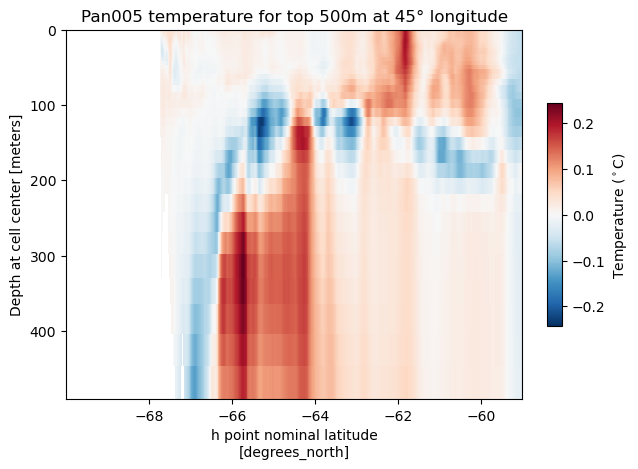

In [60]:

#Old
temp_135_anom_new.plot(cbar_kwargs={"label": "Temperature ($^\circ$C)", "fraction": 0.03, "aspect": 15, "shrink": 0.7})
plt.gca().invert_yaxis()
plt.title("Pan005 temperature for top 500m at 45° longitude")


Text(0.5, 1.0, 'Pan005 temperature at 45° longitude')

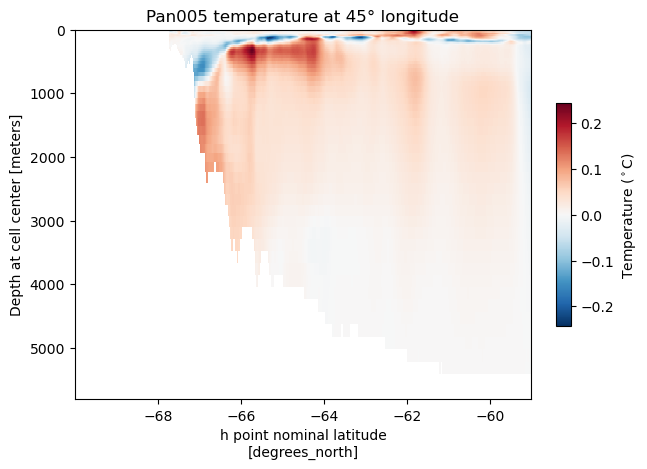

In [61]:

#Old
temp_135_anom.plot(cbar_kwargs={"label": "Temperature ($^\circ$C)", "fraction": 0.03, "aspect": 15, "shrink": 0.7})
plt.gca().invert_yaxis()
plt.title("Pan005 temperature at 45° longitude")
